<a href="https://colab.research.google.com/github/JeonChaeHwan/oss/blob/main/osmnx2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 2.2 MB/s eta 0:00:00


In [5]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt

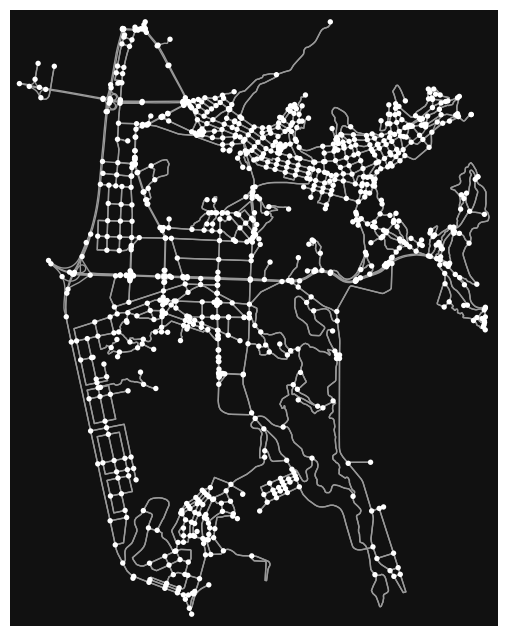

In [8]:
place = "Saha-gu, Busan, Korea"
G = ox. graph_from_place(place, network_type='drive')
fig, ax = ox.plot_graph(G)


최단거리

In [9]:
# impute missing edge speeds and cacluate edge travel times with the speed module
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

<ipython-input-9-f4909004aef5>:2: FutureWarning: The `add_edge_speeds` function has moved to the `routing` module. Calling `speed.add_edge_speeds` is deprecated and will be removed in the v2.0.0 release. Call it via `routing.add_edge_speeds` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.speed.add_edge_speeds(G)
<ipython-input-9-f4909004aef5>:3: FutureWarning: The `add_edge_travel_times` function has moved to the `routing` module. Calling `speed.add_edge_travel_times` is deprecated and will be removed in the v2.0.0 release. Call it via `routing.add_edge_travel_times` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.speed.add_edge_travel_times(G)


In [10]:
# get the neares network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G, X=128.96755631796773, Y=35.1160159413744)
dest = ox.distance.nearest_nodes(G, X=128.96517223758627, Y=35.016698756214056)

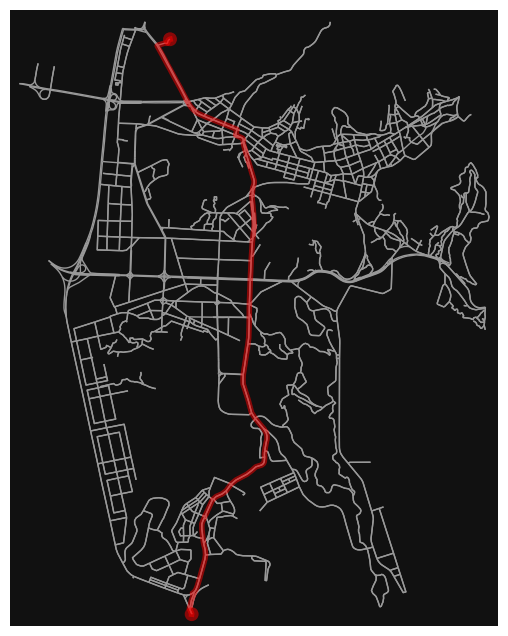

In [12]:
# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [ ]:
routes = ox.k_shortes_paths(G, orig, est, 3, weight="travle_time")
paths = [r for r in routes]

In [ ]:
# find the k-shortest paths between nodes, minimizing travel time, then plot it
fig, ax = ox.plot_graph_routes(G, paths, route_colors=['r', 'b', 'c'], route_linewidth=3)